**Introduction**

This dataset has pulled from four different sources United Nations Development Program, World Bank, Kaggle and World Health Organization. Since this data set doesn't have enough information for 2016, we'll exclude it from the dataset. Also, this dataset didn't include China and India. Two of the biggest countries in Asia by population.

Loading libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing file from the local storage

In [3]:
global_suicide = pd.read_csv('C:/Users/somnath/OneDrive/Documents/Data Analysis/csv file/Global_suicide_rate.csv')

**Cleaning:**

Since we don't have enough data in 2016, so we will exclude year '2016' from the dataset and changing data value '5-14 years' to '05-14 years' in age column.

In [4]:
global_suicide = global_suicide[global_suicide.year!= 2016]
global_suicide["age"] = global_suicide["age"].str.replace("5-14 years","05-14 years")

Rename the columns names

In [5]:
global_suicide.rename(columns={"suicides/100k pop":"suicides_pop","country-year":"country_year","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                  "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [6]:
global_suicide.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
global_suicide.describe()

,year,suicides_no,population,suicides_pop,HDI_for_year,gdp_per_capita
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
global_suicide.shape

(27660, 12)

In [9]:
global_suicide.info

<bound method DataFrame.info of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male  05-14 years           60     2762158   
27818  Uzbekistan  2014  female  05-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides_pop    country_year  HDI_for_year    gdp_for_year  \
0              6.71   

In [10]:
global_suicide.tail()

,country,year,sex,age,suicides_no,population,suicides_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [11]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

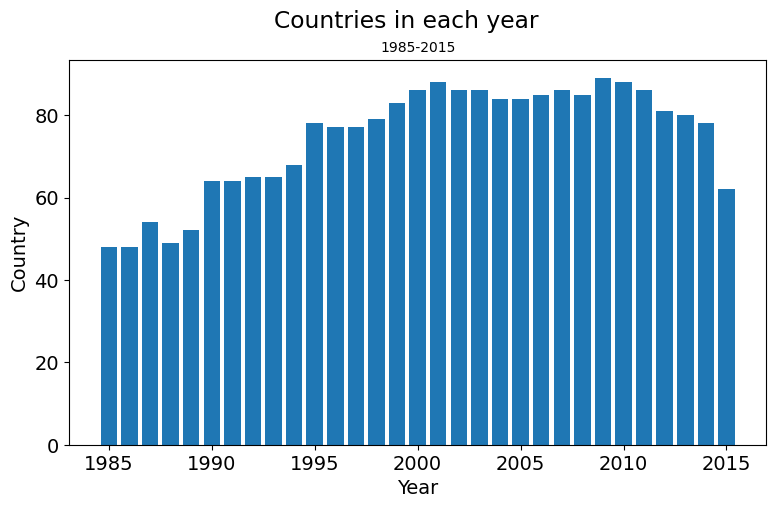

In [12]:
country_df = global_suicide.groupby(by='year', as_index=False).agg({'country': pd.Series.nunique})
country_df
plt.bar(country_df.year, country_df.country)
plt.suptitle('Countries in each year')
plt.title('1985-2015', fontsize = 10)
plt.xlabel('Year')
plt.ylabel('Country');

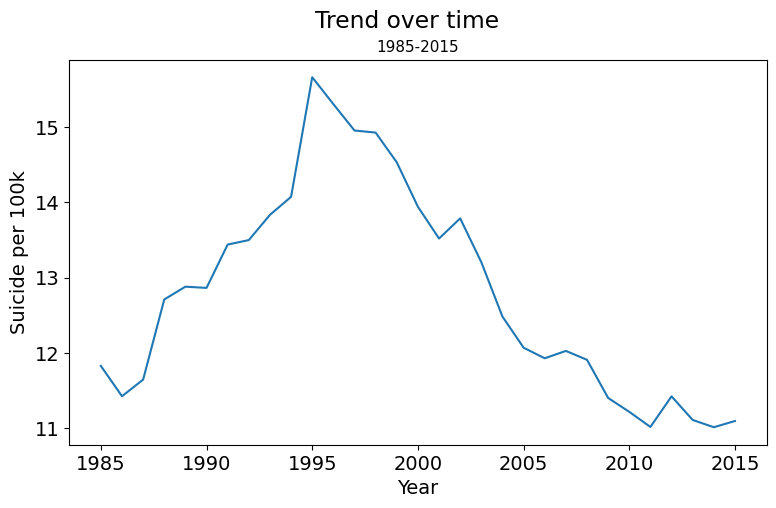

In [13]:
sns.lineplot(x = global_suicide.year, y = global_suicide.suicides_pop, errorbar = None)
plt.suptitle('Trend over time')
plt.title('1985-2015', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Suicide per 100k');


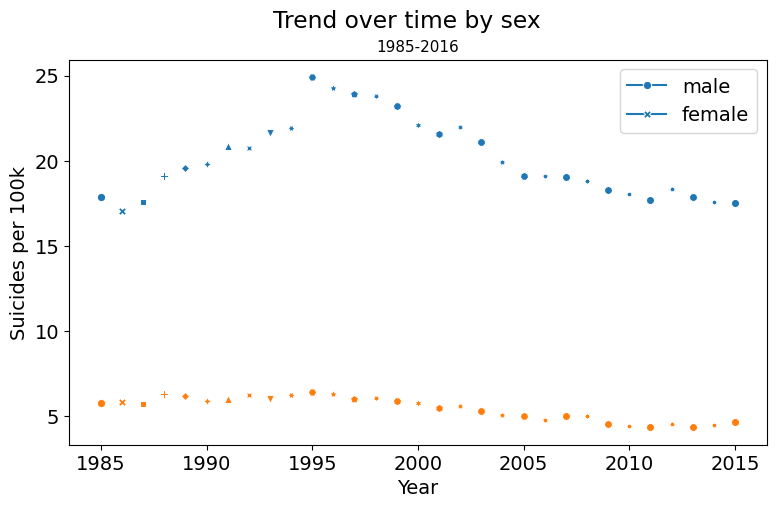

In [71]:
male_df = global_suicide[global_suicide.sex == 'male']
female_df = global_suicide[global_suicide.sex == 'female']
sns.lineplot(x = male_df.year, y = male_df.suicides_pop, style = male_df.year, markers= True, errorbar = None, dashes = False)
sns.lineplot(x = female_df.year, y = female_df.suicides_pop, style = female_df.year, markers= True, errorbar = None, dashes = False);
plt.suptitle('Trend over time by sex')
plt.title('1985-2016', fontsize = 11)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k')
plt.legend(['male', 'female']);

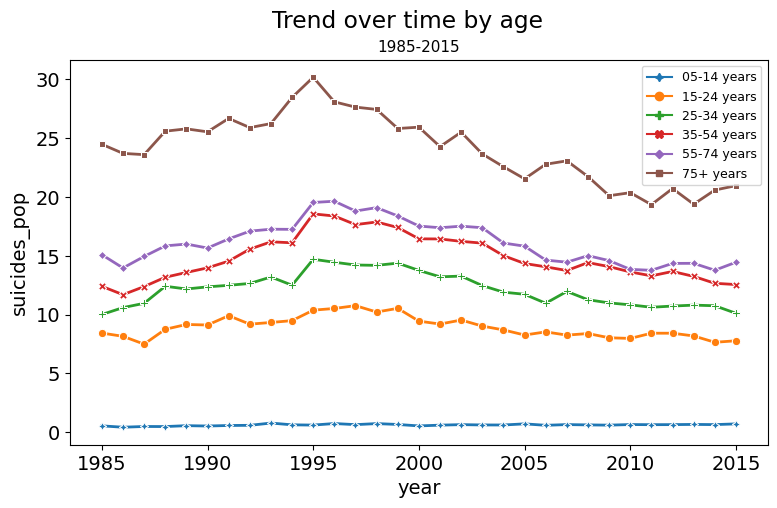

In [52]:
sns.lineplot(x = global_suicide.year,
             y = global_suicide.suicides_pop,
             hue = global_suicide.age,
             hue_order  = ['05-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'],
             style = global_suicide.age, 
             linewidth = 2, markers = True, 
             errorbar = None, dashes = False)
plt.suptitle('Trend over time by age')
plt.title('1985-2015', fontsize = 11)
plt.legend(loc = 1, fontsize = 9);

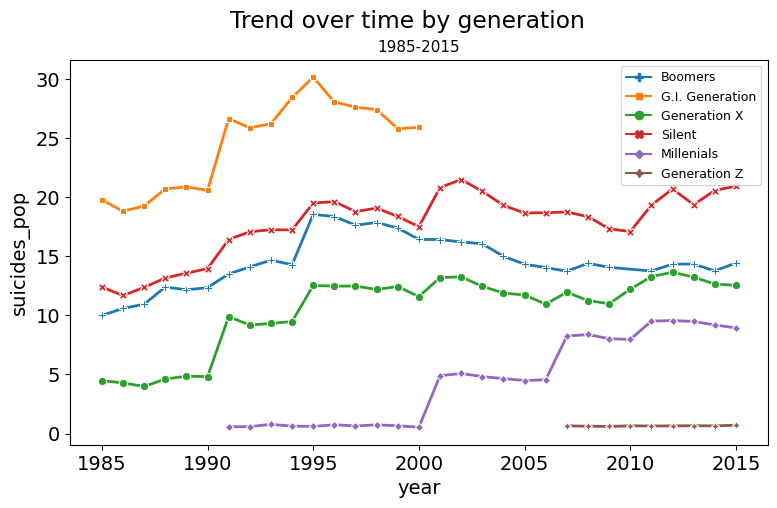

In [50]:
sns.lineplot(x = global_suicide.year,
             y = global_suicide.suicides_pop,
             hue = global_suicide.generation,
             hue_order= ['Boomers', 'G.I. Generation','Generation X', 'Silent', 'Millenials', 'Generation Z'],
             style = global_suicide.generation,
             linewidth = 2, markers = True,
             errorbar = None, dashes = False)
plt.suptitle('Trend over time by generation')
plt.title('1985-2015', fontsize = 11)
plt.legend(loc = 1, fontsize = 9);

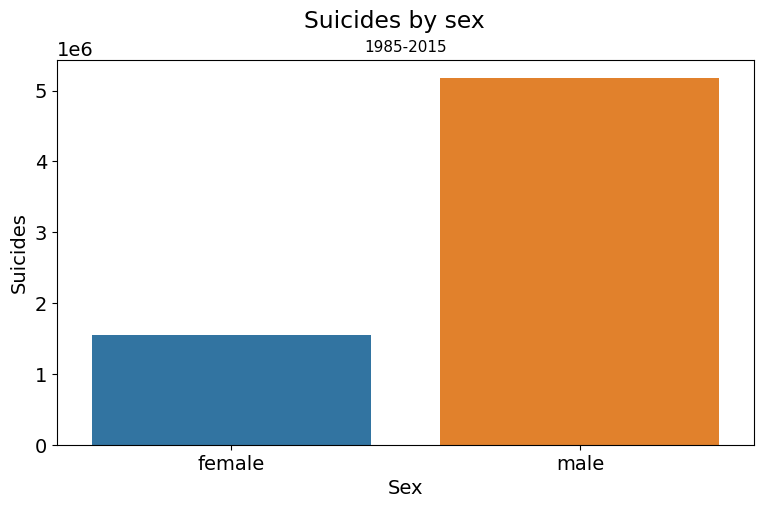

In [62]:
sex_df = global_suicide.groupby(by = 'sex', as_index = False).agg('suicides_no').sum()
sns.barplot(x = sex_df.sex, y = sex_df.suicides_no)
plt.suptitle('Suicides by sex')
plt.title('1985-2015', fontsize = 11)
plt.xlabel('Sex')
plt.ylabel('Suicides');